In [61]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

In [40]:
#####FUCNIONES#####

#Limpieza
#Ahora vamos a quedarnos solo con los contornos mayores a 10 (Es uan forma de sacar el ruido)
def filtrar_contornos(contornos, umbral):
    '''Esta función recibe una lista de contornos, y devuelve aquellos que tengan más
    puntos que el valor umbral'''
    contornos_filtrada = []
    i = 0
    while i < len(contornos):  
        if len(contornos[i])>umbral:  #Si el contorno (contornos[i]) tiene mas de 15 puntos,
            contornos_filtrada.append(contornos[i]) #Lo agregamos a la lista filtrada
        i = i + 1
    return contornos_filtrada

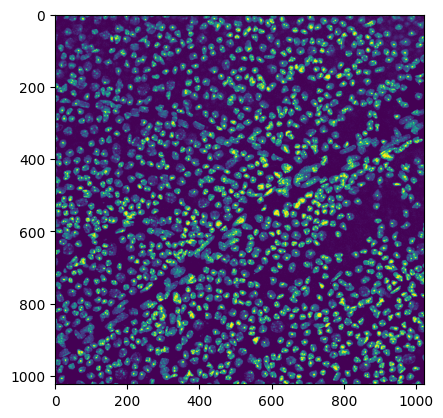

In [5]:
#Ver la foto con matplotlib
ruta = "Fotos/DAPI.tif"
imagen = plt.imread(ruta)
plt.imshow(imagen)


In [ ]:
#¿Por qué la muestra con esos colores?
imagen.shape

(1024, 1024)

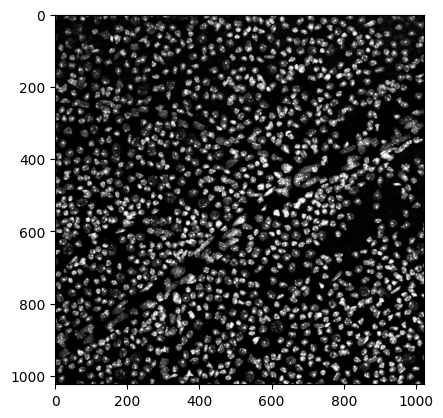

In [11]:
#Ahora abrimos la misma imagen, pero con la libreria cv2
img = cv2.imread(ruta)
plt.imshow(img)

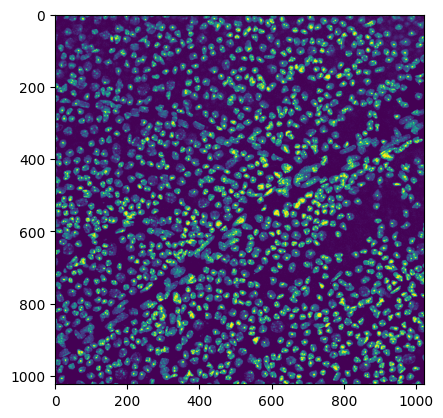

In [20]:
#CV2, por defecto, crea las imagenes en formato BGR, con cv2.COLOR_BGR2RGB o cv2.COLOR_BGR2GRAY podemos pasarlas al formato que queramos
nucleos = cv2.imread(ruta, cv2.COLOR_BGR2GRAY)
plt.imshow(nucleos)

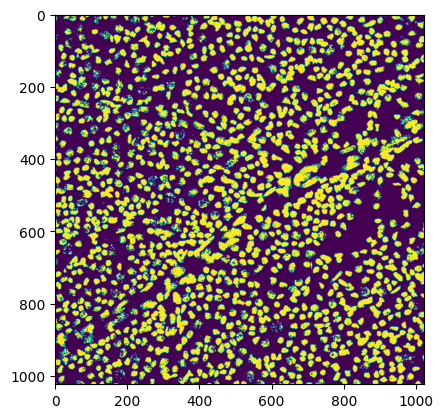

In [21]:
#Primero vamos a necesitar una imagen binaria. Antes lo hicimos con numpy, pero cv2 ya tare una función para eso

umbral_min = 45
umbral_max = 255

Threshold, bi_image = cv2.threshold(nucleos, umbral_min, umbral_max, cv2.THRESH_BINARY)
#Notar que cv2.threshold devuelve 2 cosas, el umbral minimo y el array que queremos.
#El 4to parametro es c[omo calcula es umbral, y se puede ver en https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
plt.imshow(bi_image)

In [58]:

#Ahora vamos por los contornos
contours, hierarchy = cv2.findContours(image = bi_image, mode = cv2.RETR_LIST, method = cv2.CHAIN_APPROX_NONE)
#Contours es una lista con muchas otras listas adentro, donde cada lista interna tiene una serie de puntos que definen un contorno.
#Usnado la función que definimos al ppio, filtramos la lista de contornos para quedarnos con aquellos que tienen más de 50 puntos:
contornos = filtrar_contornos(contours, 50)

In [59]:
#Calculamos las areas para todos los contornos usando la funcion que viene en cv2

areas = []
for ctn in contornos:
    area = cv2.contourArea(ctn)
    areas.append(area)

minimo = 33.5, media = 247.5, max = 3317.5


C:\Users\salva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


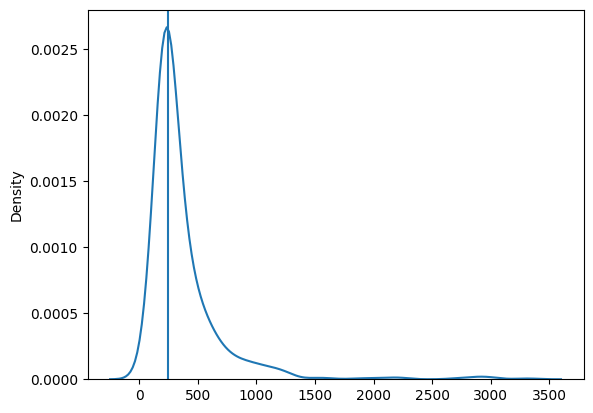

In [ ]:
sns.kdeplot(areas)
media = np.median(areas)
max = np.max(areas)
min = np.min(areas)
plt.axvline(media)
print(f"minimo = {min}, media = {media}, max = {max}")

Vamos a asumir que la moda es más o menos lo que mide un núcleo solo. Asi que vamos a usar eso como area para un nucleo, 2*moda el area de 2 nucleos y etc...

In [62]:
#Primero hacemos 6 listas donde vamos a ir guardando los contornos según su tamaño
l1, l2, l3, l4, l5, l6 = [],[],[],[],[],[]
nucleos_tot = 0
i = 0
while i < len (contornos):    
    
    if area[i] < 1.5 * media:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 1
        
    elif area[i] < 2.5 * media:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 2

    elif area[i] < 3.5 * media:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 3


    elif area[i] < 4.5 * media:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 4
        

    elif area[i] < 5.5 * media:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 5
        

    else:
        l1.append(contornos[i])
        nucleos_tot = nucleos_tot + 6
    


TypeError: 'float' object is not subscriptable